### Библиотеки

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set_style("darkgrid")

### Данные

In [69]:
raw_data = pd.read_excel('Project 2_2023.xlsx', sheet_name='Data')
raw_data = raw_data.rename(columns={'Date':'Timestamp'})
raw_data['Timestamp'] = pd.to_datetime(raw_data['Timestamp'])
raw_data.isna().sum() # пропусков нет

Timestamp    0
Income       0
Outcome      0
Balance      0
dtype: int64

In [70]:
# приводим к формату даты
assert pd.to_datetime(raw_data['Timestamp']).dt.hour.unique() == np.array([0]), "указывается часы"
assert pd.to_datetime(raw_data['Timestamp']).dt.minute.unique() == np.array([0]), "указывается минуты"
assert pd.to_datetime(raw_data['Timestamp']).dt.second.unique() == np.array([0]), "указывается секунды"

raw_data['Date'] = pd.to_datetime(raw_data['Timestamp']).dt.date
data = raw_data.copy()

### Визуализация

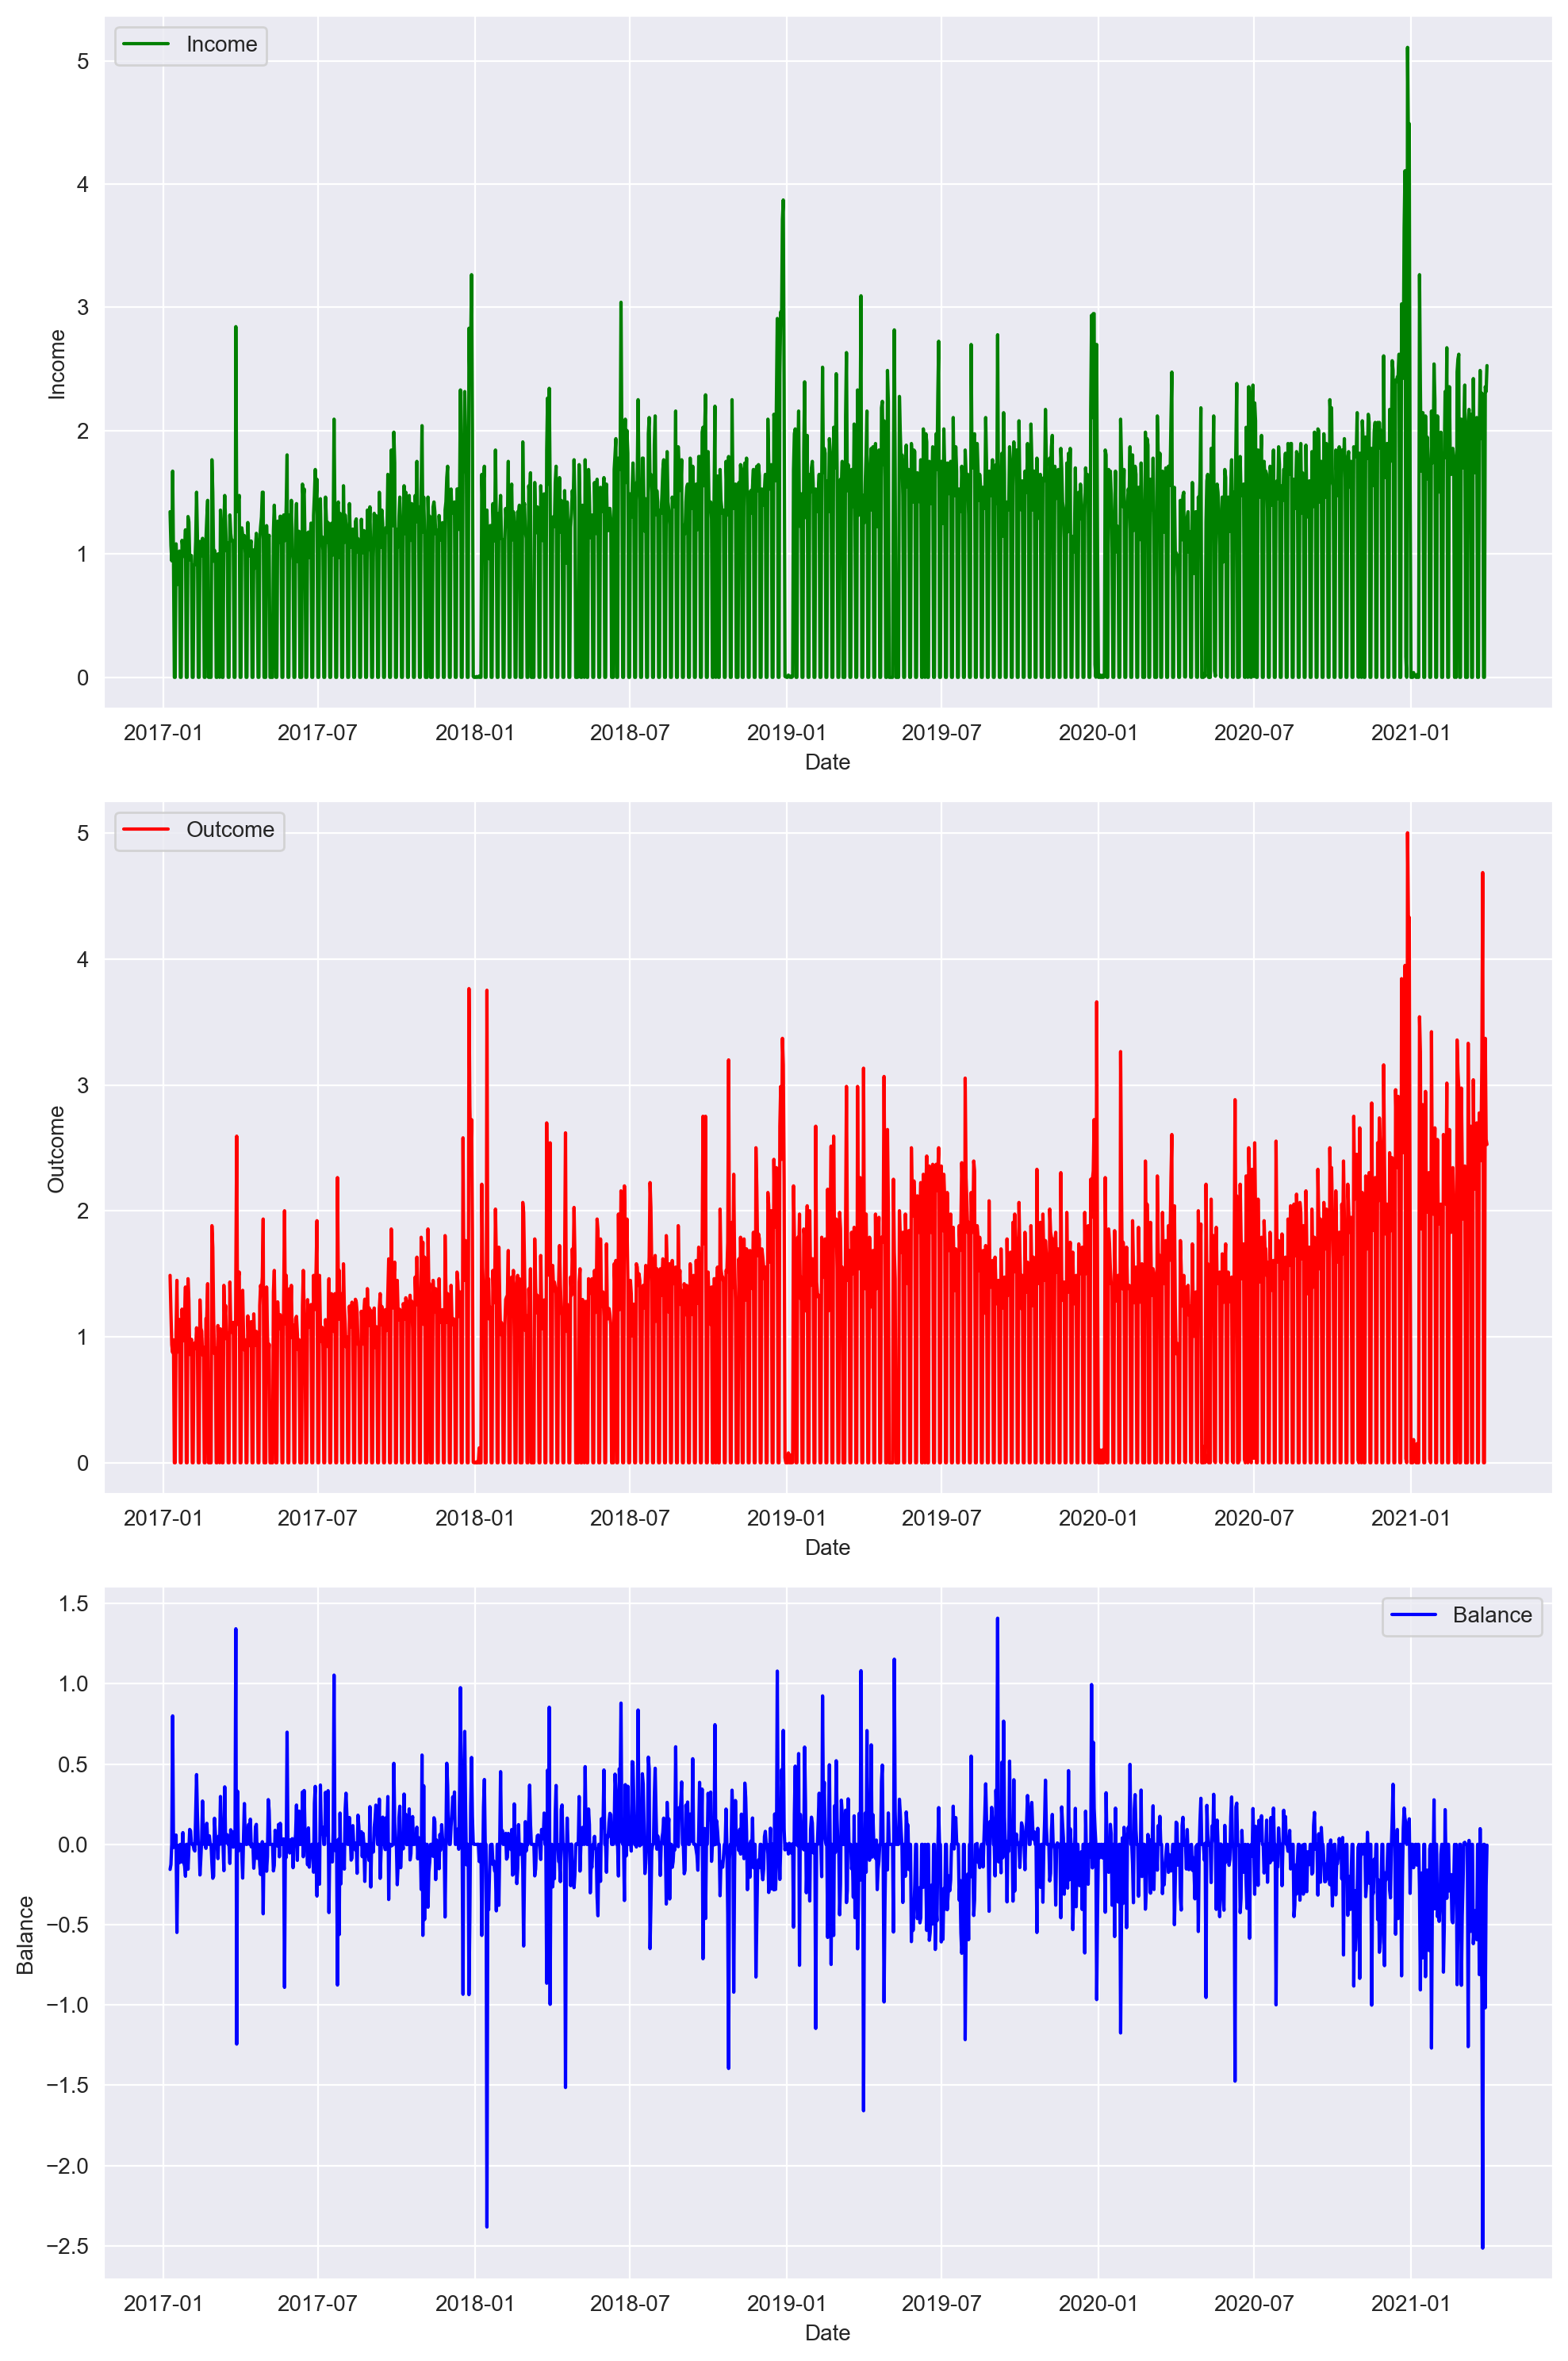

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

sns.lineplot(data=data, x='Date', y='Income', ax=ax1, color='green', label='Income')


sns.lineplot(data=data, x='Date', y='Outcome', ax=ax2, color='red', label='Outcome')


sns.lineplot(data=data, x='Date', y='Balance', ax=ax3, color='blue', label='Balance')

plt.tight_layout()
plt.show()

__Выводы:__

* На первом и втором графике видны регулрные нулевые значения, причем одновременно на income и outcome
* На третьем графике заметен перевес в сторону отрицательного баланса с 2020 гола (в 2021 году еще сильнее)

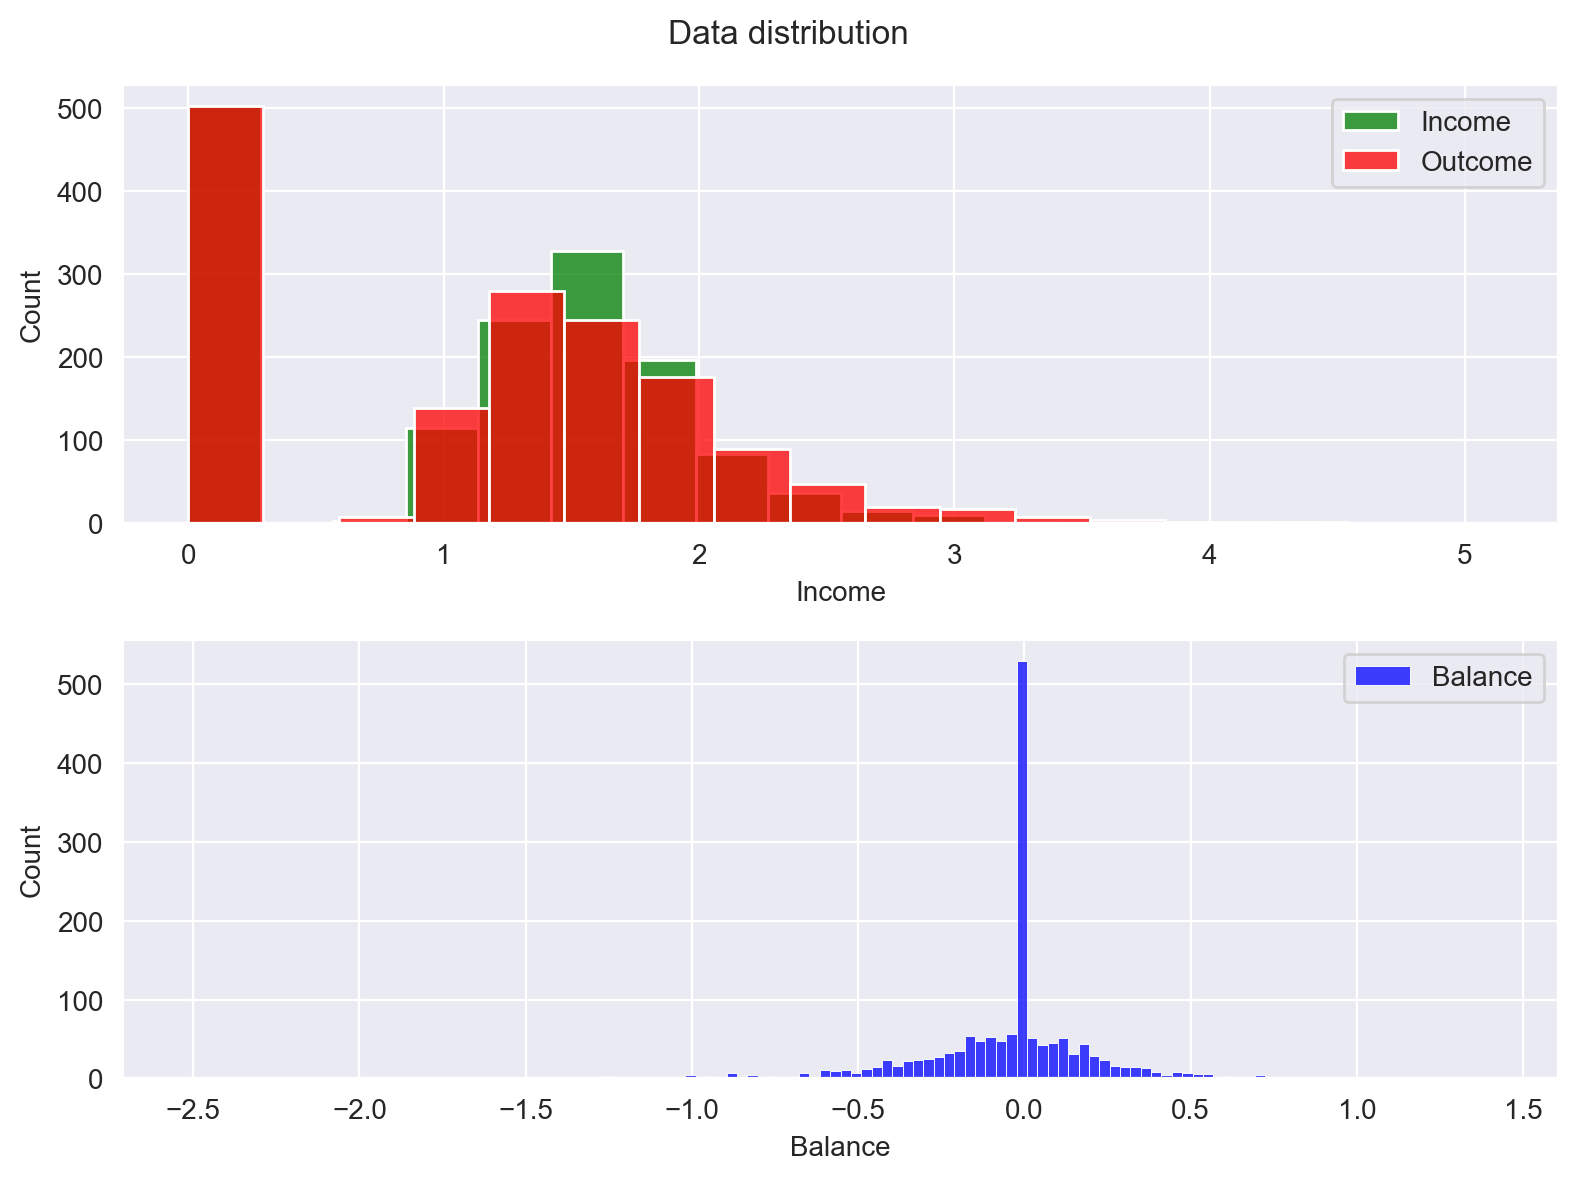

In [72]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

sns.histplot(data=data, x='Income', ax=ax1, color='green', label='Income')
sns.histplot(data=data, x='Outcome', ax=ax1, color='red', label='Outcome')
ax1.legend()

sns.histplot(data=data, x='Balance', ax=ax2, color='blue', label='Balance')
ax2.legend()

plt.suptitle('Data distribution')
plt.tight_layout()
plt.show()

__Выводы:__

* Примерно одинаковое кол-во нулей у income и outcome
* Balance имеет тяжелые хвосты

### Учет календарной информации

In [76]:
data['week_day'] = data['Timestamp'].dt.day_of_week

In [77]:
data

,Timestamp,Income,Outcome,Balance,Date,week_day
0,2017-01-09,1.343028,1.487865,-0.155904,2017-01-09,0
1,2017-01-10,1.068610,1.194182,-0.125572,2017-01-10,1
2,2017-01-11,0.944429,0.936663,0.007767,2017-01-11,2
3,2017-01-12,1.672202,0.875379,0.800391,2017-01-12,3
4,2017-01-13,0.955924,0.975645,-0.019721,2017-01-13,4
...,...,...,...,...,...,...
1538,2021-03-27,0.000000,0.000000,0.000000,2021-03-27,5
1539,2021-03-28,0.000000,0.000000,0.000000,2021-03-28,6
1540,2021-03-29,2.356883,3.370738,-1.017679,2021-03-29,0
1541,2021-03-30,2.317382,2.567554,-0.259687,2021-03-30,1
